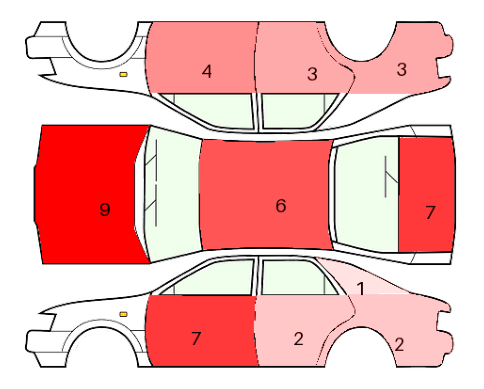

In [40]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import pandas as pd
import json

# Load the image
img_path = './crop_diagram_data.png'
img = Image.open(img_path)

# Load the LabelMe annotations
annotation_path = './crop_diagram_data.json'
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

# Create a drawing context
draw = ImageDraw.Draw(img, 'RGBA')

# Example data: number of flaws in different regions

# flaw_data = pd.read_csv()

df = pd.read_csv('../dashboard/data/detected_flaws.csv')
flaw_data = df.groupby('roi')['flaw_type'].count()
max_flaws = max(flaw_data)

# max_flaws = max(flaw_data.values())

# Function to determine the color based on the number of flaws
def get_color(flaw_count):
    # Normalize flaw count to a value between 0 and 255
    color_ratio = 255 / max_flaws
    color_intensity = int(min(flaw_count * color_ratio, 255))
    return (255, 0, 0, color_intensity)  # Red color with varying opacity


def get_centroid(polygon):
    x_coords = [p[0] for p in polygon]
    y_coords = [p[1] for p in polygon]
    centroid_x = sum(x_coords) / len(polygon)
    centroid_y = sum(y_coords) / len(polygon)
    return (centroid_x, centroid_y)

# Font settings for annotation
font = ImageFont.load_default(size=20)

# Color the regions based on the flaw data
for shape in annotations['shapes']:
    part_name = shape['label']
    if part_name in flaw_data:
        polygon = [(x, y) for x, y in shape['points']]
        color = get_color(flaw_data[part_name])
        draw.polygon(polygon, fill=color)

        centroid = get_centroid(polygon)
        draw.text(centroid, str(flaw_data[part_name]), fill='black', font=font)

img_array = np.array(img)
plt.imshow(img_array)
plt.axis('off')
plt.show()


In [34]:
flaw_data

roi
bonnet        9
fl_door       7
fr_door       4
front_left    4
rl_door       2
rl_down       2
rl_up         1
rr_door       3
rr_down       3
tailgate      7
top_up        6
Name: flaw_type, dtype: int64